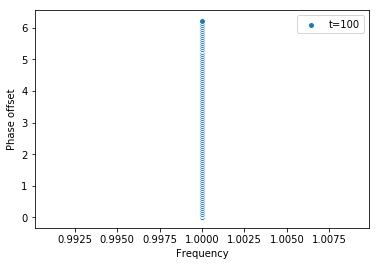

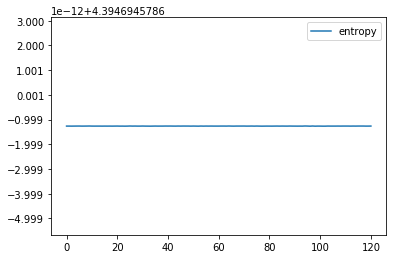

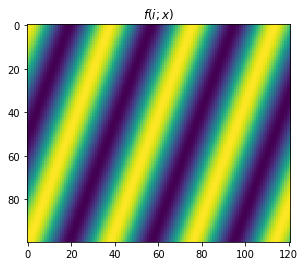

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




n = 100
m = 4

t = np.linspace(0.,20.,num=121).reshape((1,-1))
w = np.ones((n,1))
# z = np.zeros((n,1))

# w = 1 + np.random.sample((n,1))*2.
# w = np.linspace(1,5,num=n).reshape((n,1))
z = np.linspace(0.,2.*np.pi,num=n, endpoint=False).reshape((n,1))

# freq = np.linspace(1,4,num=m)
# freq = np.random.sample(n)*2 + 1.

# for i in range(m):
#     num = n//m
#     w[i*num:i*num + num,0] = freq[i]
#     z[i*num:i*num + num,0] = np.linspace(0.,2.*np.pi, num=num, endpoint=False)

#     z[i*num:i*num + num,0] = z[i*num:i*num + num,0] +  np.random.sample()*np.pi*2.

f   =          np.cos(w*t + z)
df  = - w    * np.sin(w*t + z)
ddf = - w**2 * np.cos(w*t + z)

vel = df
dvel = ddf
s   = np.sum(vel**2, axis=0)
ds  = np.sum(2*vel*dvel, axis=0)


sig  = np.sum(np.exp(f), axis=0, keepdims=True)
pr   = np.exp(f)/sig
dsig = np.sum(df*np.exp(f), axis=0, keepdims=True)

dpr = (df*np.exp(f)*sig - sig*np.exp(f))/sig**2

dlog = dpr/pr

I    = np.sum(pr*dlog**2, axis=0)
H    = - np.sum(pr*np.log(pr), axis=0)





z=z%(2.*np.pi)
plt.xlabel("Frequency")
plt.ylabel("Phase offset")
plt.scatter(w, z, edgecolor="white",label="t={}".format(len(w)))
plt.legend()
plt.show()


# plt.plot(s, label="speed");
plt.plot(H, label="entropy")
# plt.plot(I, label="fisher info")
# plt.plot( np.sum(w**2 * np.sin(w*t + z)**2, axis=0))
plt.legend();
plt.show()

plt.title("$f(i; x)$")


# plt.plot(pr[2])
# img = pr
# img = img - np.amin(img)
# img = img/np.amax(img)
plt.imshow(f)

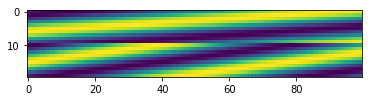

In [7]:
t = np.linspace(0.,4.,num=100).reshape((1,-1))

n = 20
m = 5
w = np.ones((n,1))
z = np.zeros((n,1))




def code(m, n, t, s):
    for i in range(m):
        num = n//m
        w[i*num:i*num + num, 0] = s[i]
        z[i*num:i*num + num, 0] = np.linspace(0.,2.*np.pi, num=num, endpoint=False)
        
        z[i*num:i*num + num, 0] = z[i*num:i*num + num, 0] +  np.random.sample()*np.pi*2.

    f = np.cos(t*w + z)
#     f = np.exp(50.*f)
#     f = f/np.sum(f, axis=0, keepdims=True)
    
    return f

def fisher(f):
    logf = np.log(f)
    d_logf = -logf[:,:-1] + logf[:,1:]
    I = np.sum(f[:,:-1]*d_logf**2, axis=0)
    return I


def entropy(f):
    logf = np.log(f)
    H = - np.sum(f*logf, axis=0)
    return H



plt.imshow(code(2, n, t, [1.,2.]))
plt.show()

# plt.plot(df[0])
# plt.plot(np.log(f))
# plt.plot(1./f*f_)


